<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/RandomForest_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
# 在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均值，中值，或者其他最常用的数值填补到数据中(专用于填补缺失值)  
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
dataset = load_boston()
dataset.data.shape
# (506, 13)

In [26]:
x_full, y_full = dataset.data, dataset.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

In [27]:
# 假设缺失数据的比例是50%，那总共就要有3289个数据缺失

rng = np.random.RandomState(0) # 一种随机模式
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor是向下取整

In [28]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值

# 用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0, n_features, n_missing_samples)
# randint(上限，下限，n) 在上限和下限之前任意取出n个整数
missing_samples = rng.randint(0, n_samples, n_missing_samples)

# #missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
# 当抽取的数据量小于样本量，可以使用np.random.choice来抽样，choice会随机抽取不重复的随机数，使数据更分散

In [35]:
x_missing = x_full.copy()
y_missing = y_full.copy()

In [36]:
x_missing[missing_samples, missing_features] = np.nan
x_missing = pd.DataFrame(x_missing)
x_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [39]:
# 使用0和均值及进行填充
# 使用均值进行填充
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # 实例化
x_missing_mean =  imp_mean.fit_transform(x_missing) # 训练fit+导出predict = fit_transform
pd.DataFrame(x_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [46]:
# 用0值进行填充
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)
pd.DataFrame(x_missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


In [60]:
# 使用随机森林填补缺失值
# 找出数据集中，缺失值的个数，True==1，False==0
x_missing_reg = x_missing.copy()
x_missing_reg.isnull().sum()

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [61]:
# 将几类按照缺失值大小进行排序
np.sort(x_missing_reg.isnull().sum(axis=0))
# 结果中没有索引

array([185, 189, 196, 197, 197, 200, 200, 201, 201, 202, 203, 204, 214])

In [62]:
np.argsort(x_missing_reg.isnull().sum(axis=0))
# 返回从小到大顺序所对应的索引

0      6
1     12
2      8
3      7
4      9
5      0
6      2
7      1
8      5
9      4
10     3
11    10
12    11
dtype: int64

In [63]:
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [64]:
for i in sortindex:
  # 构建新的特征矩阵(没有选中去填充的特征+原始的标签)和新标签(选中去填充的标签)
  df = x_missing_reg
  fillc = df.iloc[:,i]
  df = pd.concat([df.iloc[:,df.columns!=i], pd.DataFrame(y_full)], axis=1) # 按照行连接
  df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)
  # 找出训练集和测试集
  Ytrain = fillc[fillc.notnull()]
  # 需要Ytest的索引
  Ytest = fillc[fillc.isnull()]
  # 新特征矩阵上，被选出的要填充的特征的非空值所对应
  Xtrain = df_0[Ytrain.index, :]
  # 新特征矩阵上，被选出的要填充特征的空值
  Xtest = df_0[Ytest.index,:]

  # 用随机森林回归来填充
  rfc = RandomForestRegressor(n_estimators=100)
  rfc = rfc.fit(Xtrain, Ytrain)
  Ypredict = rfc.predict(Xtest)

  x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = Ypredict


x_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.240075,18.00,7.1705,0.10,0.538000,6.66393,65.200,4.090000,1.00,296.00,18.096,390.9752,4.9800
1,0.027310,0.00,5.6216,0.00,0.469000,6.13635,78.900,4.967100,2.00,293.54,18.336,396.9000,9.1400
2,0.027290,13.27,7.0700,0.00,0.466100,7.18500,61.100,4.037789,2.00,242.00,17.879,388.9673,4.9156
3,0.087047,21.01,3.2003,0.00,0.458000,6.88500,45.800,4.835231,3.39,222.00,18.700,391.9195,5.8522
4,0.120600,0.00,2.1800,0.00,0.463808,7.14700,57.976,4.937713,3.84,248.10,18.700,392.6104,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.457120,2.64,9.7868,0.00,0.573000,6.29775,69.100,3.051948,1.00,291.03,21.000,392.2906,9.6700
502,0.045270,0.00,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.984,396.9000,9.0800
503,0.717052,0.34,11.9300,0.25,0.573000,6.97600,91.000,2.370936,5.14,362.04,21.000,389.1134,5.6400
504,0.109590,0.00,11.9300,0.10,0.573000,6.31341,89.300,3.119769,1.00,256.31,21.000,393.4500,6.4800


In [66]:
X = [x_full, x_missing_mean, x_missing_0, x_missing_reg]
mse = []

for x in X:
  estimator = RandomForestRegressor(random_state=0, n_estimators=100)
  score = cross_val_score(estimator,x,y_full,scoring="neg_mean_squared_error",cv=5).mean()
  mse.append(score*-1)

In [67]:
mse

[21.571667100368845,
 40.848037216676374,
 49.626793201980185,
 18.131007378625505]

In [71]:
[*zip(["x_full", "x_missing_mean", "x_missing_0", "x_missing_reg"],mse)]

[('x_full', 21.571667100368845),
 ('x_missing_mean', 40.848037216676374),
 ('x_missing_0', 49.626793201980185),
 ('x_missing_reg', 18.131007378625505)]

[Text(0, 0, 'Full data'),
 Text(0, 0, 'Zero Imputation'),
 Text(0, 0, 'Mean Imputation'),
 Text(0, 0, 'Regressor Imputation')]

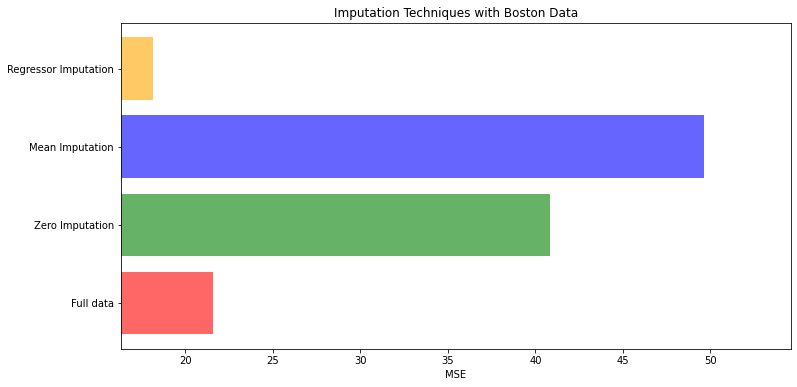

In [78]:
xlabels = ['Full data','Zero Imputation',"Mean Imputation","Regressor Imputation"]
colors = ["r","g","b","orange"]
plt.figure(figsize=(12,6))
ax = plt.subplot(111) # 添加子图（多个图标）

for i in np.arange(len(mse)):
  # 画条形图
  ax.barh(i,mse[i],color=colors[i],alpha=0.6,align="center") # alpha=0.6表示条形图的宽度,align="center"图放在中心

ax.set_title("Imputation Techniques with Boston Data")
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel("MSE")
ax.set_yticklabels(xlabels)